# Part I - (Prosper Loan Data)
## by (Esther Wanjiru)

## Introduction
> Introduce the dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.shape

(113937, 81)

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
#Converting the variableS below to their correct data types 
df.ListingNumber = df.ListingNumber.astype(object)
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

In [7]:
#Dropping the columns with so many null values
df.drop(['GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
         'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing',
        'LoanFirstDefaultedCycleNumber'], axis = 1, inplace = True)

In [42]:
#Confirming if the changes have been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113936 entries, 0 to 113936
Data columns (total 71 columns):
ListingKey                            113936 non-null object
ListingNumber                         113936 non-null object
ListingCreationDate                   113936 non-null datetime64[ns]
CreditGrade                           28953 non-null object
Term                                  113936 non-null int64
LoanStatus                            113936 non-null object
ClosedDate                            55089 non-null datetime64[ns]
BorrowerAPR                           113936 non-null float64
BorrowerRate                          113936 non-null float64
LenderYield                           113936 non-null float64
EstimatedEffectiveYield               84852 non-null float64
EstimatedLoss                         84852 non-null float64
EstimatedReturn                       84852 non-null float64
ProsperRating (numeric)               84852 non-null float64
ProsperRating (Alph

In [9]:
df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [10]:
df.duplicated().sum()

0

### What is the structure of your dataset?
This data set contains 113,936 loans with 71 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

The are no duplicate values.



### What is/are the main feature(s) of interest in your dataset?

Loan Status



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Term

BorrowerAPR

BorrowerRate

EmploymentStatus

StatedMonthlyIncome

Loan Original Amount



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.






In [11]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

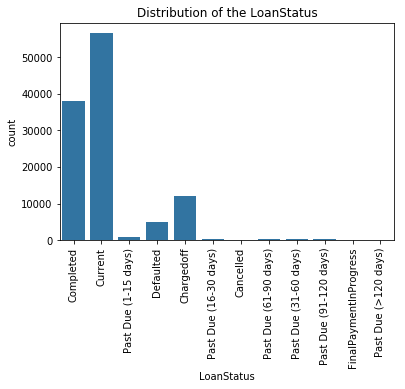

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='LoanStatus', color = base_color)
plt.xticks(rotation=90)
plt.title('Distribution of the LoanStatus');

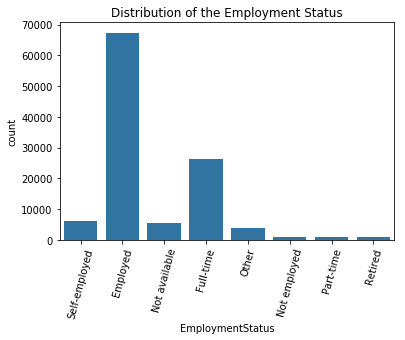

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='EmploymentStatus', color = base_color)
plt.xticks(rotation=75);
plt.title('Distribution of the Employment Status');

A bar chart showing the distribution of the employment status variable. Most borrowers are employed, followed by full-time. 

In [14]:
df.BorrowerRate.max()

0.4975

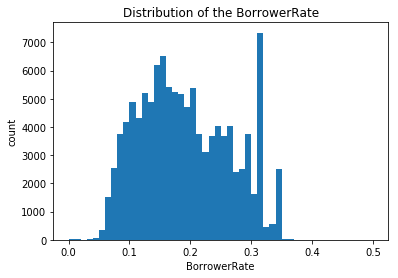

In [15]:
bins = np.arange(0, df['BorrowerRate'].max()+0.01,0.01)
plt.hist(data = df, x = 'BorrowerRate', bins=bins)
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.title('Distribution of the BorrowerRate');

The histogram shows the distribution of the borrowers rate of interest on the loans. The chart is slightly skewed to the right but a sharp rise is noticed with the rate 0.31.

In [16]:
df[df.BorrowerRate > 0.31]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297,NaN,36,Defaulted,2012-12-19,0.35797,0.3177,0.3077,...,-9.81,0.00,3790.25,3790.25,0.00,1.0000,0,0,0.0,10
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783,NaN,36,Current,NaT,0.35356,0.3134,0.3034,...,-35.80,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,94
31,0F683558129866945165D36,643927,2012-09-21 13:37:43.210,NaN,36,Current,NaT,0.35797,0.3177,0.3077,...,-23.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,24
71,0DD23561917467486206661,658787,2012-10-23 13:43:45.530,NaN,36,Current,NaT,0.35797,0.3177,0.3077,...,-30.43,0.00,0.00,0.00,0.00,0.9247,0,0,0.0,49
74,0DEB351032566848818E832,496566,2011-03-04 14:21:40.320,NaN,36,Chargedoff,2013-09-15,0.35643,0.3199,0.3099,...,-39.20,0.00,1031.89,1031.89,0.00,1.0000,0,0,0.0,50
88,10803531522293214B198DF,538785,2011-11-13 20:05:58.260,NaN,36,Completed,2012-05-31,0.35643,0.3199,0.3099,...,-20.34,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,48
91,0FD13502904293521146412,487757,2010-12-13 09:44:54.653,NaN,36,Completed,2011-12-09,0.35858,0.3220,0.3120,...,-25.64,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,54
94,0FEE354060248231998406E,563980,2012-02-29 11:20:32.767,NaN,36,Current,NaT,0.35797,0.3177,0.3077,...,-59.58,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,6
100,0F67356860455769574096F,704916,2013-01-25 11:48:26.040,NaN,36,Chargedoff,2013-08-30,0.35356,0.3134,0.3034,...,-6.41,0.00,3855.23,3855.23,0.00,1.0000,0,0,0.0,73
107,10BE354254173728633D033,573446,2012-03-29 12:17:10.017,NaN,36,Defaulted,2012-12-23,0.35797,0.3177,0.3077,...,-9.81,0.00,3790.25,3790.25,0.00,1.0000,0,0,0.0,13


There are so many loans with an interest rate above 0.31 with the frequency between 0.31 and 0.32 almost 7000 so we will just maintain them in the dataset

In [17]:
#plt.hist(data = df, x ='BorrowerAPR')
#Running this code outputs to an error because we have some missing values for the variable BorrowerAPR

In [18]:
df[df['BorrowerAPR'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557,HR,36,Completed,2006-01-06,NaN,0.10000,0.0950,...,-4.02,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887,AA,36,Completed,2006-04-10,NaN,0.06500,0.0550,...,-2.59,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457,AA,36,Completed,2005-11-29,NaN,0.04350,0.0385,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,3
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810,AA,36,Completed,2006-03-21,NaN,0.06395,0.0552,...,-1.30,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,4
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753,AA,36,Completed,2008-06-05,NaN,0.06000,0.0550,...,-16.08,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,10
39870,B6E73366056348939D8801F,24,2005-11-20 14:45:55.193,C,36,Completed,2006-10-24,NaN,0.12000,0.1150,...,-53.96,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
43587,2F123364529418907A58D4C,19,2005-11-18 14:16:59.093,AA,36,Completed,2005-11-29,NaN,0.08500,0.0750,...,-1.10,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
62297,2F25336514614362295DA03,7,2005-11-15 18:25:56.107,E,36,Completed,2005-11-30,NaN,0.17000,0.1150,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1
71280,DED033645500376547AF34E,60,2005-12-29 19:53:41.000,C,36,Completed,2008-04-21,NaN,0.09000,0.0850,...,-74.98,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,8
71875,F50A33647261871547E3E0D,68,2006-01-06 13:05:50.890,AA,36,Completed,2006-07-11,NaN,0.07000,0.0650,...,-6.01,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1


In [19]:
#Filling the null values with zeros, assuming there were no annual APR costs on these loans
df['BorrowerAPR'].fillna(0, inplace = True)

In [20]:
df['BorrowerAPR'].isnull().sum()

0

In [21]:
df['BorrowerRate'].max()

0.4975

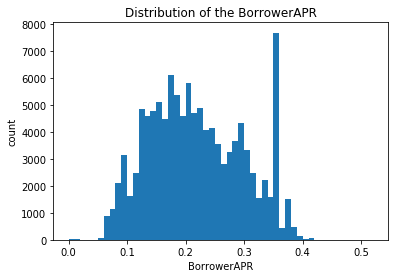

In [22]:
bins = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = df, x ='BorrowerAPR', bins=bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
plt.title('Distribution of the BorrowerAPR');

The histogram shows the distribution of the borrowers APR rates  on the loans. The chart is slightly skewed to the right but a sharp rise is noticed with the rate of 0.36.

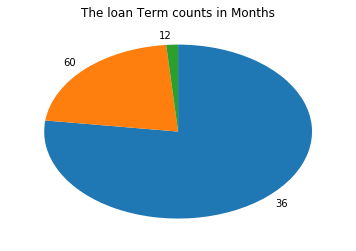

In [23]:
term_counts = df['Term'].value_counts()
plt.pie(term_counts, labels = term_counts.index,startangle = 90, counterclock = False)
plt.title('The loan Term counts in Months');

A pie chart showing the three categories of the terms for the loans in months. Most of the loans fall under the length of 36 months.

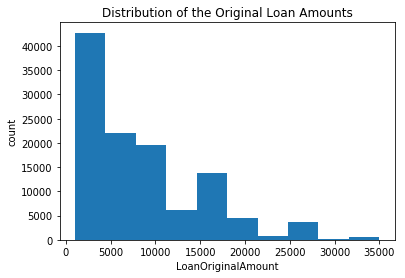

In [24]:
plt.hist(data=df, x = 'LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count');
plt.title('Distribution of the Original Loan Amounts');

The histogram above shows the highest amount borroweed to be 35000 while most of the borrowers had below amount 10000.

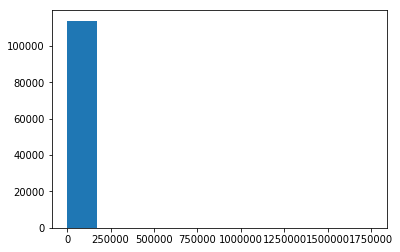

In [25]:
plt.hist(data = df, x = 'StatedMonthlyIncome');

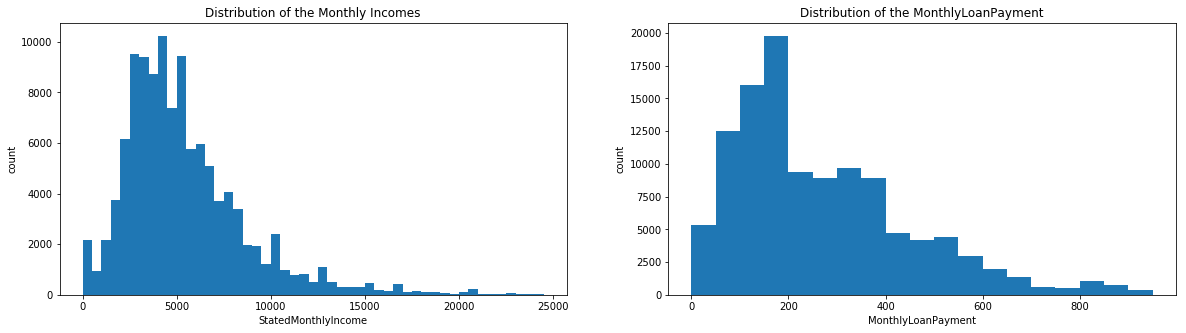

In [26]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)

bins = np.arange(0, 25000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('count');
plt.title('Distribution of the Monthly Incomes');

plt.subplot(1,2,2)
bins = np.arange(0, 1000, 50)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('count');
plt.title('Distribution of the MonthlyLoanPayment');

Subplot 1 is histogram showing the distribution of the monthly income status. The chart is skewed to the right with most of the incomes lying between 2500 and 5000. Few also lie above 20000.

Subplot 2 is a histogram showing the distribution of the monthly loan repayment. The chart is also skewed to the right with the highest payments between 100 and 200. There are also fewer payments of the highest amounts. There could be a positive correclation betwen the monthly incomes and the monthly loan repayments.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The Current Loan status has the highest frequency followed by Completed. Few of the loans lie in the past due status.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The BorrowerRate and the Borrower APR had almost the same distribution although sharp rises were noticed in the 0.31 and 0.36 occurences respectively. Also the Borrower Apr variable had Null Values which were replaced with zeros assuming that the borrowers were not charged the annual costs on the loans.

The Status monthly income was also right skewed with most of the incomes lying in between 2500 and 5000 with few incomes on the higher side. This wasn't clear enough the histogram plotted with all the dataset, so had to set the bins to a maximum value of 25000. There was also a similar observation with a histogram showing the distribution of monthly loan repayments.

The highest Loan Original amount borrowed is 35000 while most of the loans borrowed are below an amount of 5000 and below.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

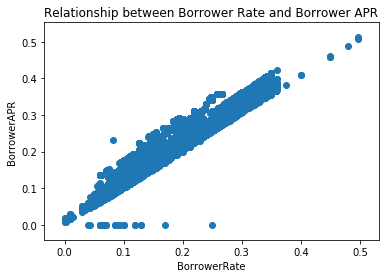

In [27]:
plt.scatter(data=df, x='BorrowerRate', y ='BorrowerAPR')
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR');
plt.title('Relationship between Borrower Rate and Borrower APR');

A scatter plot showing a position relationship between Borrower's rate and Apr. Some of the borrowers seem not to have been charged for APR.

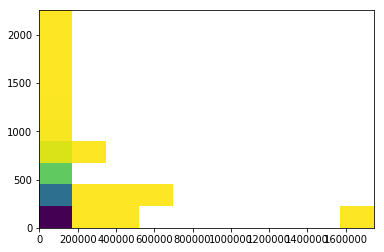

In [28]:
plt.hist2d(data=df, x='StatedMonthlyIncome', y='MonthlyLoanPayment', cmin=0.5, cmap='viridis_r');


In [29]:
df[df.StatedMonthlyIncome > 750000]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
53167,F9AD3540233111834F3D8A0,560783,2012-02-20 12:53:44.577,NaN,36,Current,NaT,0.35797,0.3177,0.3077,...,-57.63,-59.06,0.0,0.0,0.0,1.0,0,0,0.0,2


In [30]:
df.drop([53167], inplace = True)

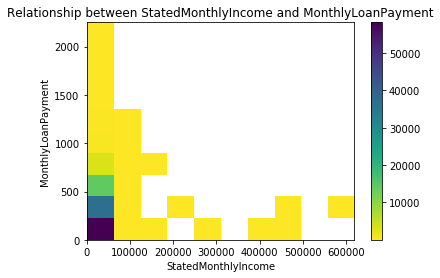

In [31]:
plt.hist2d(data=df, x='StatedMonthlyIncome', y='MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('MonthlyLoanPayment')
plt.title('Relationship between StatedMonthlyIncome and MonthlyLoanPayment');

A heatmap showing the relationship between StatedMonthlyIncome and MonthlyLoanPayment. The output is not as clear as expected with some oen spaces in between the cahrt.

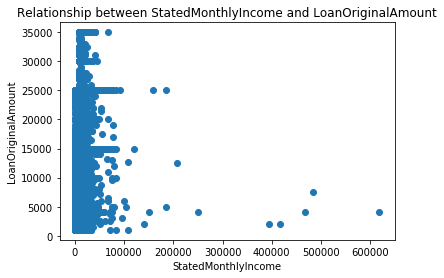

In [32]:
plt.scatter(data=df, x='StatedMonthlyIncome', y ='LoanOriginalAmount')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('LoanOriginalAmount')
plt.title('Relationship between StatedMonthlyIncome and LoanOriginalAmount');

A scatter plot showing the relation between StatedMonthlyIncome and LoanOriginalAmount variables. Most of the borrowers have a monthly income below 100000.

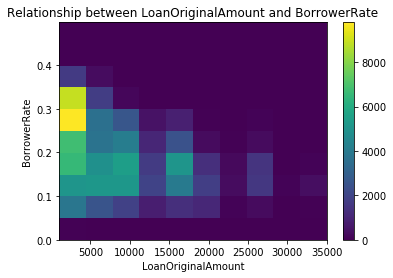

In [33]:
plt.hist2d(data=df, x='LoanOriginalAmount', y='BorrowerRate')
plt.colorbar()
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.title('Relationship between LoanOriginalAmount and BorrowerRate');

A heatmap showing a positive correlation between the original loan amount and the borrower rate, the higher the amount borrowed the higher the interest.

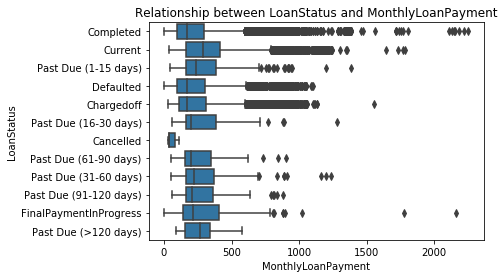

In [34]:
sb.boxplot(data=df, y='LoanStatus', x='MonthlyLoanPayment',color=base_color)
plt.title('Relationship between LoanStatus and MonthlyLoanPayment');

A boxplot above shows the relationship between LoanStatus and MonthlyLoanPayment. The current status have the highest in terms of monthly loan payments.

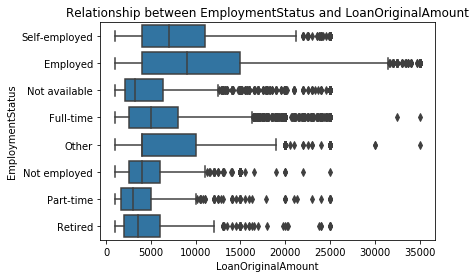

In [35]:
sb.boxplot(data=df, y='EmploymentStatus', x='LoanOriginalAmount',color=base_color)
plt.title('Relationship between EmploymentStatus and LoanOriginalAmount');

A boxplot above shows the relationship between EmploymentStatus and LoanOriginalAmount. The employed status have the highest number in terms of loans borrowed followed by self-employed.

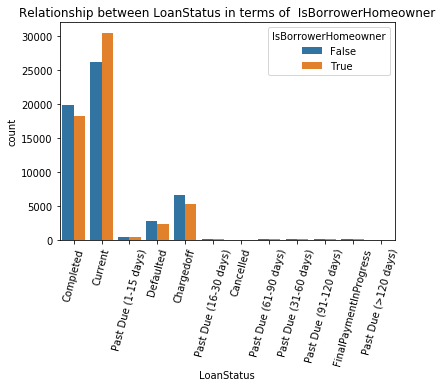

In [36]:
sb.countplot(data=df, x='LoanStatus', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=75)
plt.title('Relationship between LoanStatus in terms of  IsBorrowerHomeowner');

A clustered chart showing the relationship of loan status while sorting by the variable IsBorrowerHomeowner.

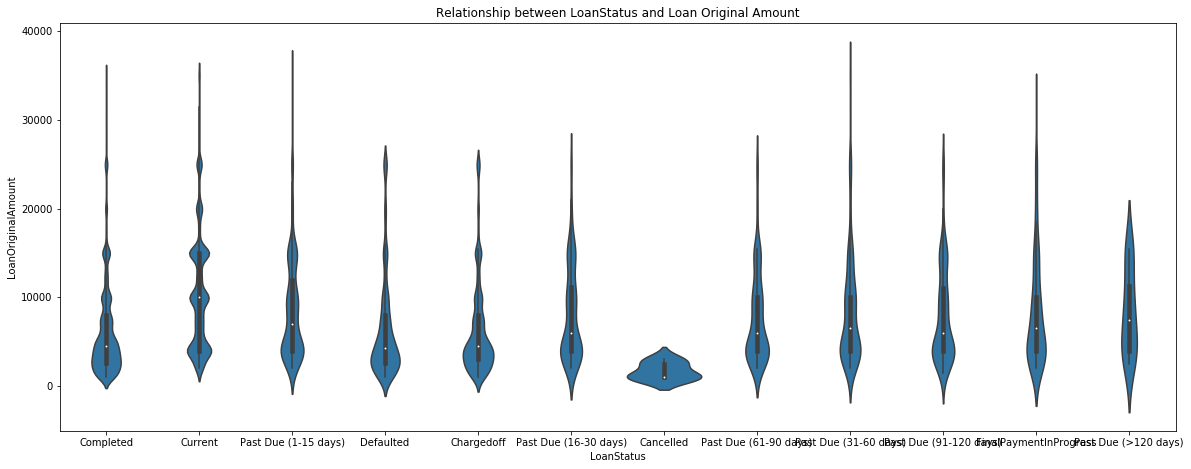

In [37]:
plt.figure(figsize = [20,7.5])
sb.violinplot(data=df, x='LoanStatus', y='LoanOriginalAmount',color=base_color)
plt.title('Relationship between LoanStatus and Loan Original Amount');

A violin plot showing the relationship between the LoanStatus and Loan Original Amount variables.

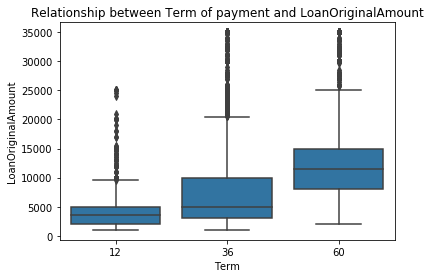

In [38]:
sb.boxplot(data=df, y='LoanOriginalAmount', x='Term',color=base_color)
plt.title('Relationship between Term of payment and LoanOriginalAmount');

The boxplot above shows that the more the loan amount, the more the period of payment.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The current loan status have the highest number of homeowners and also the highest number of monthly loan ayments.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The Borrower rate and the borrower APR have a positive correlation.

The employed status have the highest number in terms of monthly loan payments though with the most observed outliers.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

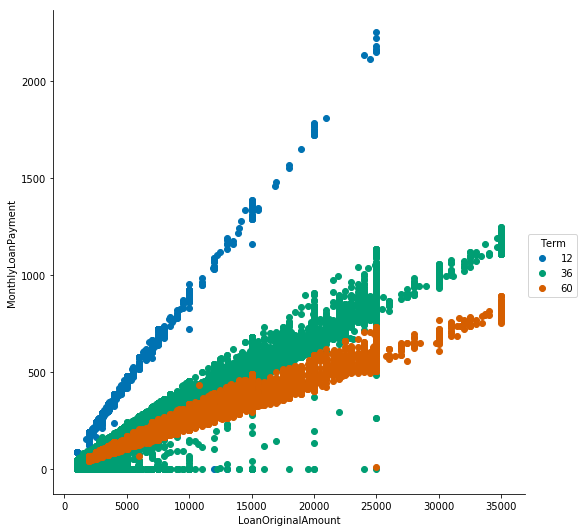

In [39]:
g = sb.FacetGrid(data = df, hue = 'Term', size = 7.5,
                 palette = 'colorblind')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend();

A scatter plot showing the relationship of the three variables, that is, loan original amount, monthly payments and the term of repayment

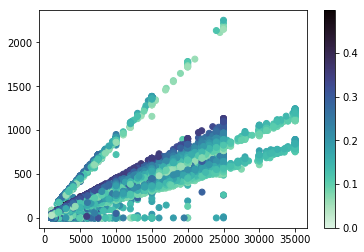

In [40]:
plt.scatter(data = df, y = 'MonthlyLoanPayment', c = 'BorrowerRate', x = 'LoanOriginalAmount',
            cmap = 'mako_r')
plt.colorbar();

The scatter plot above shows the relationship between MonthlyLoanPayment, BorrowerRate and LoanOriginalAmount variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The loan original amount has a positive correlation with the stated monthly income. But it was also noted that most of the loan borrowers are home owners.

Borrower's rate also increased with increased loan amounts.




### Were there any interesting or surprising interactions between features?



## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

Several relationships were noticed between the variable of interest and the other variables including but not limited to:

Most of the loans are in the Current status which are going through monthly repayments. Also several of the oans have been completed while few fall in the past-due status.

Most of the borrowers are employed followed by self-employed, full-time and so on.

Most of the loans are repayable with 36 months.

The maximum amount borrowed is 35000 but most of the loans lie between an amount of 10000 and below.

The rate of interest increses with the amount borrowed. But it was realized that some of the loans had a higher monthly repayment and that resulted to lower rate of interest.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [43]:
df.to_csv('loan.csv')